# Practice for 5511 Deeplearning : Text Mining for Amazon Musical Instruments Reviews


*June 2023*


### **Problem Statement**

The objective of this project is to perform Sentimental Analysis for the customer review data. Help the organization to understand better about their customer feedback's So that they can concentrate on those issues customer's are facing. Build the model which has highest accuracy in classifying the feedback as positive,Negative and neutral.

### **Data Source:**

https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews


The data set includes 10261 records, including columns: reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time
Description of columns in the file:

| **Column Name** | **Description**                               |
|-----------------|-----------------------------------------------|
| reviewerID      |  ID   of the reviewer, e.g. A2SUAM1J3GNN3B    |
| asin            |  ID of the product, e.g. 0000013714           |
| reviewerName    |  name of the reviewer                         |
| helpful         |  helpfulness rating of the review,   e.g. 2/3 |
| reviewText      |  text of the review                           |
| overall         |  rating of the product                        |
| summary         |  summary of the review                        |
| unixReviewTime  |  time of the review (unix time)               |
| reviewTime      |  time of the review (raw)                     |


### **Methodology**

RNN will be built for this project.  

By completing this project, we hope to enhance our knowledge of RNN and its applicability in real-world scenarios.

### **Detail steps** 


**1. Exploratory Data Analysis (EDA)** 

Firstly we will explore and visualize the data to understand the structure and distribution of the data.  

**2. Model Training & Evaluation**

Next, we will build RNN with training data set and check the performance on photo dataset. 
Different architecture such as LSTM & GRU will be tried.


**3. Conclusions**

Finally, we will summarize the results and see what can be improved in the future. 

In [1]:
# importing the necessary libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
from tqdm import tqdm
import re

import nltk # To work with natural language
from nltk.tokenize import word_tokenize # To tokenize each tweet
from nltk.corpus import PlaintextCorpusReader # To create the corpus

import regex as re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,GRU,Dense,SpatialDropout1D,Dropout,Flatten
from keras.initializers import Constant
from keras.optimizers import Adam

from keras.callbacks import LearningRateScheduler
import math
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

import warnings

# Define the filter to ignore the MarkupResemblesLocatorWarning
warnings.filterwarnings("ignore", category=UserWarning, message="MarkupResemblesLocatorWarning")

#  EDA

### DATA LOADING

In [2]:
df_train = pd.read_csv('./data/Musical_instruments_reviews.csv')


In [3]:
df_train.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
df_train.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"
10260,A2WA8TDCTGUADI,B00JBIVXGC,TheTerrorBeyond,"[0, 0]","These strings are really quite good, but I wou...",4.0,"These strings are really quite good, but I wou...",1405468800,"07 16, 2014"


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


### DATA DISTRIBUTION

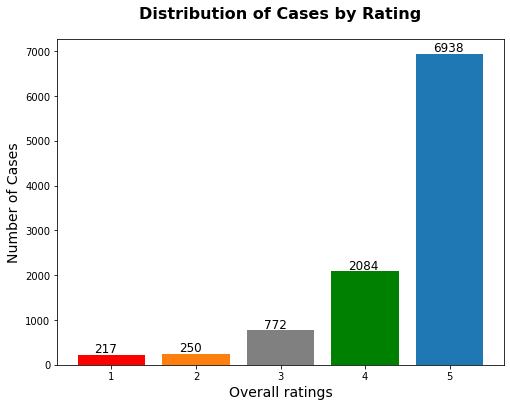

In [6]:
# Count the cases by label
cases_by_label = df_train['overall'].value_counts().sort_index()


plt.figure(figsize=(8,6)) # Set the figure size
plt.bar(cases_by_label.index, cases_by_label.values, color=['red', 'tab:orange', 'grey', 'green', 'tab:blue'] )
plt.title('Distribution of Cases by Rating', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Overall ratings', fontsize=14)

plt.ylabel('Number of Cases', fontsize=14)
# plt.xticks(cases_by_label.index, ['Non-disaster', 'Disaster'], fontsize=12)

for i, v in enumerate(cases_by_label.values):
    # plt.text(i-0.1, v+50, str(v), color='black', fontsize=12)
    plt.text(i+0.8, v+50, str(v), color='black', fontsize=12)

plt.show()

### DATA TRANSFORM

In [7]:
# replacing numerical values with categorical values and reduce the classes to sentiments

df_train['sentiment'] = df_train.overall.replace({
    1:'Negative',
    2:'Negative',
    3:'Neutral',
    4:'Positive',
    5:'Positive'
})

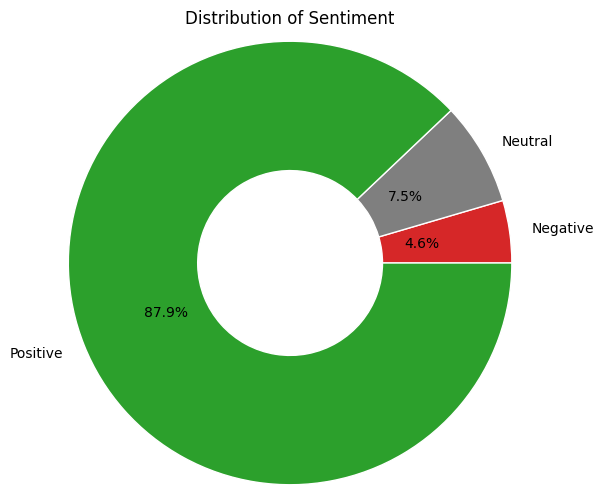

In [15]:
# Plot the donut chart


cases_by_label = df_train['sentiment'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8,6))

# Draw a circle
centre_circle = plt.Circle((0,0),0.3,fc='white',linewidth=1)
fig.gca().add_artist(centre_circle)

# Plot the donut chart
ax.pie(cases_by_label, labels=cases_by_label.index.tolist(), autopct='%1.1f%%', startangle=0, radius=1.2,
       wedgeprops=dict(width=0.7, edgecolor='w'),colors=['tab:red','tab:grey','tab:green'])

plt.title('Distribution of Sentiment')

plt.show()

In [8]:
# summarize numeric columns
df_train.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [9]:
# summarize text columns
df_train.describe(include=['object'])

,reviewerID,asin,reviewerName,helpful,reviewText,summary,reviewTime,sentiment
count,10261,10261,10234,10261,10254,10261,10261,10261
unique,1429,900,1397,269,10254,8852,1570,3
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]","Not much to write about here, but it does exac...",Great,"01 22, 2013",Positive
freq,42,163,66,6796,1,42,40,9022


reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
sentiment          0
dtype: int64


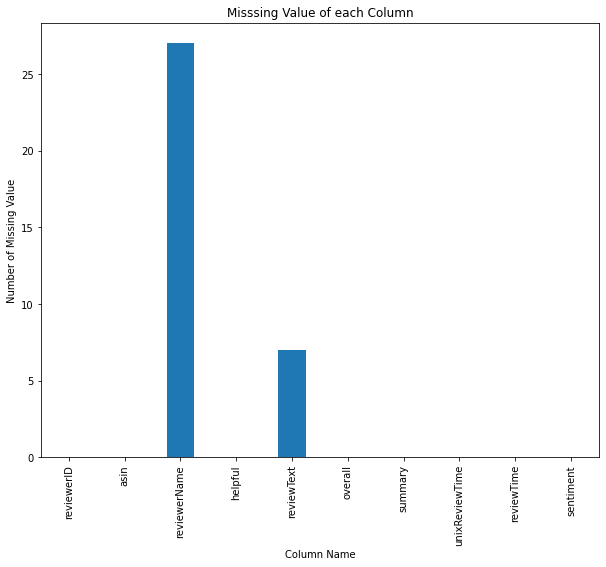

In [11]:
# Check Misssing value
null_vals = df_train.isnull().sum()
print(null_vals)
plt.figure(figsize=(10,8)) # Set the figure size

# Call plot.bar() method to create the bar plot
null_vals.plot.bar()

# Set the title of the plot
plt.title("Misssing Value of each Column")

# Add x and y axis labels
plt.xlabel("Column Name")
    plt.ylabel("Number of Missing Value")

# Display the plot
plt.show()

## Observations:

* The 'reviewerName' column contains 27 missing labels, and the 'reviewText' column contains 7 missing values. 
* No missing value in 'summary' column. we will try to build model with 'summary' as input first to see the performance.
* The training dataset has an imbalanced distribution of negative, neutral, and positive cases, with a ratio of 4.6:7.5:87.9. If we do not balance the data, the model may simply predict all cases as positive, resulting in an accuracy of 87.9%.

### DATA CLEANING



Replace missing values in 'reviewText' column to empty string ''

In [12]:
# replace null values in reviewText column with empty strings
df_train['reviewText'].fillna('', inplace=True)

df_train.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive


Clean text in 'summary' column

In [13]:
warnings.filterwarnings("ignore", category=UserWarning)
# download stopwords dictionary
# nltk.download('stopwords')

# create a set of stopwords
stop_words = set(stopwords.words('english'))


# define function to clean text
def clean_text(text):
    # remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    
    # remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # remove urls
    text = re.sub(r"http\S+", "", text)

    # remove <> tags
    text = re.sub(r"</?[a-z]+>", "", text)

    # convert text to lowercase
    text = text.lower()

    # remove stopwords
    # text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

# apply the function to the 'text' column and save the cleaned text in 'summary' column
df_train['text_new'] = df_train['summary'].apply(clean_text)


In [14]:
df_train.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment,text_new
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",Positive,good
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",Positive,jake
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",Positive,it does the job well
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Positive,good windscreen for the money
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",Positive,no more pops when i record my vocals.


In [15]:
# Check cleaning result
pd.set_option('display.max_colwidth', None)
print(df_train.loc[3, ['summary', 'text_new']])

summary     GOOD WINDSCREEN FOR THE MONEY
text_new    good windscreen for the money
Name: 3, dtype: object


In [16]:
# word_tokenize(sentence)
word_tokenize(df_train.loc[3, ['text_new']][0])

['good', 'windscreen', 'for', 'the', 'money']

## DATA PROCESSING

### Balance the data

In [17]:
from sklearn.utils import resample

# Separating the dataframe by sentiment class
df_positive = df_train[df_train['sentiment'] == 'Positive']
df_negative = df_train[df_train['sentiment'] == 'Negative']
df_neutral = df_train[df_train['sentiment'] == 'Neutral']


# Downsampling the 'Positive' class to match the size of the 'Negative' and 'Neutral' classes
df_positive_downsampled = resample(df_positive, replace=False, n_samples=len(df_neutral))

# Combining the downsampled 'Positive' class with the 'Negative' and 'Neutral' classes
df_balanced = pd.concat([df_positive_downsampled, df_negative, df_neutral])

# Checking the new class proportions
df_balanced['sentiment'].value_counts(normalize=True)

Positive    0.383889
Neutral     0.383889
Negative    0.232223
Name: sentiment, dtype: float64

### Word corpus and Embedding Dictionary

In [18]:
# Create Words Tokens
import nltk
nltk.download('punkt')

# Tokenize the text in the 'summary' column and save them as a list of lists
def create_tokens(dataset):
    
    tmp_tokens =[]

    for sentence in tqdm(dataset['text_new']):
        # words = [ word.lower() for word in word_tokenize(sentence) if (word.isalpha() == 1 ) & (word not in stop_words) ]
        words = [ word.lower() for word in word_tokenize(sentence) if (word.isalpha() == 1) ]
        tmp_tokens.append(words)
    
    return tmp_tokens
    

tokens = create_tokens(df_balanced)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\emili8\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|████████████████████████████████████████████████████████████████████████████| 2011/2011 [00:00<00:00, 5411.90it/s]


In [19]:
tokens[3]

['excellent',
 'design',
 'simple',
 'solution',
 'for',
 'those',
 'who',
 'hate',
 'strap',
 'locks']

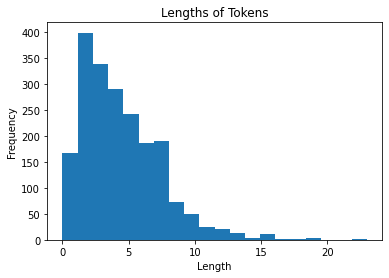

In [20]:

# Get length of token in 'tokens'
token_lengths = [len(token) for token in tokens] # get the length of each element in 'tokens'
df_lengths = pd.DataFrame(token_lengths, columns=['length']) # create a DataFrame with the lengths

plt.hist(df_lengths['length'], bins=20)

plt.title('Lengths of Tokens')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.show()



In [21]:
summary = df_lengths.describe()

print(summary)

            length
count  2011.000000
mean      4.488812
std       2.872108
min       0.000000
25%       2.000000
50%       4.000000
75%       6.000000
max      23.000000


In [22]:
# Create Embedding Dictionary

embedding_dict={}
with open('./data/glove.twitter.27B.100d.txt','r', encoding='utf8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [23]:
# Tokenize : break the sentence into single word/token
# texts_to_sequences : convert tokenized word into an encoded sequence
# pad_sequence : change the length of sequence by either adding or truncating

MAX_LEN = 6
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokens)

sequences = tokenizer.texts_to_sequences(tokens)

corpus_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')

In [96]:
# Unique words present
word_index = tokenizer.word_index
print(f"Number of unique words : {len(word_index)}")

Number of unique words : 1825


In [97]:
corpus_pad.shape

(2011, 6)

In [66]:
corpus_pad

array([[ 146,   29,   47, ...,   34,    1,  407],
       [  34,    4,    2, ...,    0,    0,    0],
       [   2,   90,   30, ...,    0,    0,    0],
       ...,
       [  71,   21,   69, ...,    6,  747,   23],
       [ 916, 1997,   12, ...,  319,   20,  105],
       [5140,    2,   34, ...,  118, 1635,    5]], dtype=int32)

In [98]:
sequences[0]

[3]

In [99]:
# Creating embedding matrix with GloVe using enbedding_dict we created above
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 1825/1825 [00:00<00:00, 268187.40it/s]


### Split data into Train & Test

In [100]:
X_train,X_test,y_train,y_test = train_test_split(corpus_pad, df_balanced['sentiment'].values, test_size = 0.25, random_state = 0 )

print('Shape of X train',X_train.shape)
print("Shape of X Validation ",X_test.shape)

print('Shape of Y train',y_train.shape)
print("Shape of Y Validation ",y_test.shape)

Shape of X train (1508, 6)
Shape of X Validation  (503, 6)
Shape of Y train (1508,)
Shape of Y Validation  (503,)


In [97]:
y_train

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [101]:
# converting categorical variables in y_train to numerical variables
y_train_dummies = pd.get_dummies(y_train).values
print('Shape of Train  Label: ', y_train_dummies.shape)

y_test_dummies = pd.get_dummies(y_test).values
print('Shape of Test Label: ', y_test_dummies.shape)


Shape of Train  Label:  (1508, 3)
Shape of Test Label:  (503, 3)


In [98]:
y_train_dummies

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [101]:
type(y_test_dummies)

numpy.ndarray

In [102]:
df_2= pd.DataFrame(y_test_dummies)
df_2.describe()

,0,1,2
count,7690.000000,7690.000000,7690.000000
mean,0.046944,0.075683,0.877373
std,0.211533,0.264507,0.328030
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [132]:
len(df_pos)

6747

In [73]:
y_train_dummies.shape

(1508, 3)

# MODELING AND EVALUATION

**In this work we will practice 2 kinds of recurrent neural networks (RNNs)**
**and see which algorithm has higher accuracy**

* LSTM (Long Short-Term Memory)
* GRU (Gated Recurrent Unit)


## Build Model: LSTM

In [102]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2


# We need sequential model to process sequence of text data
model=Sequential()

# Embedding(input_dimension, output_dimension,embeddings_initializer = initialize the embedding matrix we created, trainable = do not train)
embedding=Embedding(num_words,100,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=MAX_LEN,
                    trainable=False)
# Adding Embedding Layer
model.add(embedding)

# Drops 40% of entire row
model.add(SpatialDropout1D(0.4))


# Recurrent Layer LSTM(dimensionality of the output space, dropout = 20%, recurrent_dropout = 20%) 
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Decide what we are going to output Dense(units, activation function)
model.add(Dense(3, activation='softmax'))


# Compile the model compile(loss = categorical crossentropy, use Adam(adaptive moment estimation) optimizer with learning rate 1e-3,evaluate based on accuracy)
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])

model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 6, 100)            182600    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 6, 100)           0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 64)                42240     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 225,035
Trainable params: 42,435
Non-trainable params: 182,600
_________________________________________________________________


In [103]:
history=model.fit(X_train,y_train_dummies,batch_size=32,epochs=100,validation_data=(X_test,y_test_dummies),verbose=2)

Epoch 1/100
48/48 - 4s - loss: 1.0986 - accuracy: 0.3753 - val_loss: 1.0796 - val_accuracy: 0.3877 - 4s/epoch - 94ms/step
Epoch 2/100
48/48 - 1s - loss: 1.0740 - accuracy: 0.4290 - val_loss: 1.0633 - val_accuracy: 0.4453 - 1s/epoch - 23ms/step
Epoch 3/100
48/48 - 1s - loss: 1.0720 - accuracy: 0.4118 - val_loss: 1.0535 - val_accuracy: 0.4612 - 1s/epoch - 24ms/step
Epoch 4/100
48/48 - 1s - loss: 1.0608 - accuracy: 0.4576 - val_loss: 1.0434 - val_accuracy: 0.4930 - 1s/epoch - 24ms/step
Epoch 5/100
48/48 - 1s - loss: 1.0486 - accuracy: 0.4695 - val_loss: 1.0329 - val_accuracy: 0.5010 - 1s/epoch - 23ms/step
Epoch 6/100
48/48 - 1s - loss: 1.0414 - accuracy: 0.4894 - val_loss: 1.0229 - val_accuracy: 0.5169 - 1s/epoch - 23ms/step
Epoch 7/100
48/48 - 1s - loss: 1.0310 - accuracy: 0.4847 - val_loss: 1.0119 - val_accuracy: 0.5149 - 1s/epoch - 23ms/step
Epoch 8/100
48/48 - 1s - loss: 1.0169 - accuracy: 0.5119 - val_loss: 1.0008 - val_accuracy: 0.5249 - 1s/epoch - 23ms/step
Epoch 9/100
48/48 - 1s -

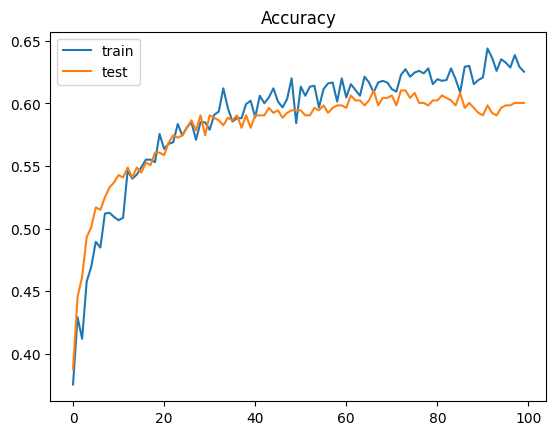

In [104]:
# Accuracy vs Epoch
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

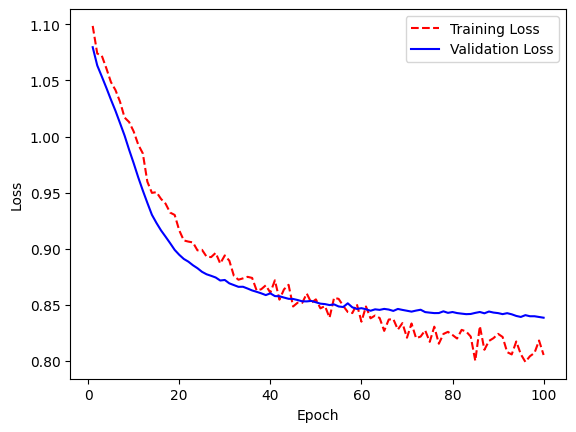

In [105]:
# Loss vs Epoch
# Visualize learning curve. Here learning curve is not ideal. It should be much smoother as it decreases.

epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r--')
plt.plot(epoch_count, history.history['val_loss'], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [107]:


from keras.regularizers import l2

# We need sequential model to process sequence of text data
model=Sequential()

# Embedding(input_dimension, output_dimension,embeddings_initializer = initialize the embedding matrix we created, trainable = do not train)
embedding=Embedding(num_words,100,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=MAX_LEN,
                    trainable=False)
# Adding Embedding Layer
model.add(embedding)

# Drops 40% of entire row
model.add(SpatialDropout1D(0.4))

# Recurrent Layer LSTM(dimensionality of the output space, dropout = 20%, recurrent_dropout = 20%) 
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))

# Add a Dense layer with L2 regularization and dropout
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Decide what we are going to output Dense(units, activation function)
model.add(Dense(3, activation='softmax'))

# Compile the model compile(loss = categorical crossentropy, use Adam(adaptive moment estimation) optimizer with learning rate 1e-3,evaluate based on accuracy)
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])

model.summary()

# # convert target variable to one-hot encoded format
# y_train = pd.get_dummies(y_train)

# train the model
history=model.fit(X_train,y_train_dummies,batch_size=32,epochs=100,validation_data=(X_test,y_test_dummies),verbose=2)



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 6, 100)            182600    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 6, 100)           0         
 lDropout1D)                                                     
                                                                 
 lstm_6 (LSTM)               (None, 64)                42240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                      

## Build Model: GRU

In [110]:
# Try GRU

# We need sequential model_gru to process sequence of text data
model_gru=Sequential()

# Embedding(input_dimension, output_dimension,embeddings_initializer = initialize the embedding matrix we created, trainable = do not train)
embedding=Embedding(num_words,100,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=MAX_LEN,
                    trainable=False)
# Adding Embedding Layer
model_gru.add(embedding)

# Drops 40% of entire row
model_gru.add(SpatialDropout1D(0.4))

# Recurrent Layer GRU(dimensionality of the output space, dropout = 20%, recurrent_dropout = 20%) 
model_gru.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))

# Decide what we are going to output Dense(units, activation function)
model_gru.add(Dense(3, activation='softmax'))

# Compile the model_gru compile(loss = binary crossentropy, use Adam(adaptive moment estimation) optimizer with learning rate 1e-3,evaluate based on accuracy)
model_gru.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])

model_gru.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 6, 100)            182600    
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 6, 100)           0         
 lDropout1D)                                                     
                                                                 
 gru_1 (GRU)                 (None, 64)                31872     
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                                                                 
Total params: 214,667
Trainable params: 32,067
Non-trainable params: 182,600
_________________________________________________________________


In [111]:
history=model_gru.fit(X_train,y_train_dummies,batch_size=32,epochs=100,validation_data=(X_test,y_test_dummies),verbose=2)


Epoch 1/100
48/48 - 4s - loss: 1.1270 - accuracy: 0.3395 - val_loss: 1.0941 - val_accuracy: 0.3837 - 4s/epoch - 75ms/step
Epoch 2/100
48/48 - 1s - loss: 1.0972 - accuracy: 0.3694 - val_loss: 1.0788 - val_accuracy: 0.4195 - 1s/epoch - 21ms/step
Epoch 3/100
48/48 - 1s - loss: 1.0871 - accuracy: 0.4098 - val_loss: 1.0714 - val_accuracy: 0.4433 - 998ms/epoch - 21ms/step
Epoch 4/100
48/48 - 1s - loss: 1.0826 - accuracy: 0.4310 - val_loss: 1.0650 - val_accuracy: 0.4592 - 999ms/epoch - 21ms/step
Epoch 5/100
48/48 - 1s - loss: 1.0815 - accuracy: 0.4231 - val_loss: 1.0605 - val_accuracy: 0.4791 - 1s/epoch - 21ms/step
Epoch 6/100
48/48 - 1s - loss: 1.0668 - accuracy: 0.4609 - val_loss: 1.0556 - val_accuracy: 0.4732 - 1s/epoch - 21ms/step
Epoch 7/100
48/48 - 1s - loss: 1.0646 - accuracy: 0.4688 - val_loss: 1.0516 - val_accuracy: 0.4672 - 1s/epoch - 21ms/step
Epoch 8/100
48/48 - 1s - loss: 1.0625 - accuracy: 0.4589 - val_loss: 1.0473 - val_accuracy: 0.4811 - 1s/epoch - 21ms/step
Epoch 9/100
48/48 

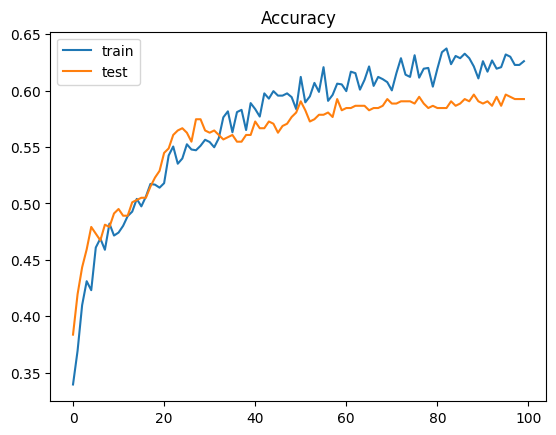

In [112]:
# Accuracy vs Epoch
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## Try LSTM with learning rate scheduling

After submitting the preiction to Kaggle, the result with LSTM is slightly higher than GRU.
Let's stick to LSTM and see if we can further improve the performance with learning rate scheduling

In [116]:
# Long Short Term Memory network.

# We need sequential model to process sequence of text data
model=Sequential()

# Embedding(input_dimension, output_dimension,embeddings_initializer = initialize the embedding matrix we created, trainable = do not train)
embedding=Embedding(num_words,100,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=MAX_LEN,
                    trainable=False)
# Adding Embedding Layer
model.add(embedding)

# Drops 40% of entire row
model.add(SpatialDropout1D(0.4))

# Recurrent Layer LSTM(dimensionality of the output space, dropout = 20%, recurrent_dropout = 20%) 
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

# Decide what we are going to output Dense(units, activation function)
model.add(Dense(3, activation='softmax'))

# Compile the model compile(loss = binary crossentropy, use Adam(adaptive moment estimation) optimizer with learning rate 1e-3,evaluate based on accuracy)
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 6, 100)            182600    
                                                                 
 spatial_dropout1d_10 (Spati  (None, 6, 100)           0         
 alDropout1D)                                                    
                                                                 
 lstm_8 (LSTM)               (None, 64)                42240     
                                                                 
 dense_12 (Dense)            (None, 3)                 195       
                                                                 
Total params: 225,035
Trainable params: 42,435
Non-trainable params: 182,600
_________________________________________________________________


In [117]:
# Define learning rate schedule
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 5.0
    lr = initial_lr * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lr

lrate = LearningRateScheduler(step_decay)

# train model with learning rate schedule
history=model.fit(X_train,y_train_dummies,batch_size=32,epochs=30,validation_data=(X_test,y_test_dummies),verbose=2,callbacks=[lrate])

Epoch 1/30
48/48 - 4s - loss: 1.0033 - accuracy: 0.4960 - val_loss: 0.8947 - val_accuracy: 0.5905 - lr: 0.0100 - 4s/epoch - 79ms/step
Epoch 2/30
48/48 - 1s - loss: 0.8950 - accuracy: 0.5763 - val_loss: 0.8882 - val_accuracy: 0.5646 - lr: 0.0100 - 1s/epoch - 23ms/step
Epoch 3/30
48/48 - 1s - loss: 0.8603 - accuracy: 0.5862 - val_loss: 0.8608 - val_accuracy: 0.6064 - lr: 0.0100 - 1s/epoch - 23ms/step
Epoch 4/30
48/48 - 1s - loss: 0.8080 - accuracy: 0.6286 - val_loss: 0.8765 - val_accuracy: 0.6083 - lr: 0.0100 - 1s/epoch - 23ms/step
Epoch 5/30
48/48 - 1s - loss: 0.7711 - accuracy: 0.6512 - val_loss: 0.8467 - val_accuracy: 0.6024 - lr: 0.0050 - 1s/epoch - 23ms/step
Epoch 6/30
48/48 - 1s - loss: 0.7439 - accuracy: 0.6664 - val_loss: 0.8805 - val_accuracy: 0.5924 - lr: 0.0050 - 1s/epoch - 23ms/step
Epoch 7/30
48/48 - 1s - loss: 0.7191 - accuracy: 0.6870 - val_loss: 0.8381 - val_accuracy: 0.6143 - lr: 0.0050 - 1s/epoch - 23ms/step
Epoch 8/30
48/48 - 1s - loss: 0.7129 - accuracy: 0.6804 - val_

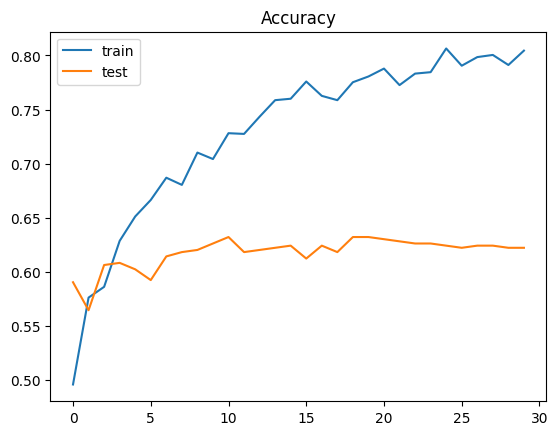

In [118]:
# Accuracy vs Epoch
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

### Try multiple layers of LSTM

With learning rate schedule, the accuracy got improved a bit, let's try deeper architecture with one more layer of LSTM.


In [121]:
# Long Short Term Memory network.

# We need sequential model to process sequence of text data
model=Sequential()

# Embedding(input_dimension, output_dimension,embeddings_initializer = initialize the embedding matrix we created, trainable = do not train)
embedding=Embedding(num_words,100,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=MAX_LEN,
                    trainable=False)
# Adding Embedding Layer
model.add(embedding)
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))

# Decide what we are going to output Dense(units, activation function)
model.add(Dense(3, activation='softmax'))

# Compile the model compile(loss = binary crossentropy, use Adam(adaptive moment estimation) optimizer with learning rate 1e-3,evaluate based on accuracy)
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=1e-4),metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 6, 100)            182600    
                                                                 
 lstm_11 (LSTM)              (None, 6, 128)            117248    
                                                                 
 dropout_4 (Dropout)         (None, 6, 128)            0         
                                                                 
 lstm_12 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)              

In [124]:
# Define learning rate schedule
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 5.0
    lr = initial_lr * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lr

lrate = LearningRateScheduler(step_decay)

# train model with learning rate schedule
history=model.fit(X_train,y_train_dummies,batch_size=32,epochs=10,validation_data=(X_test,y_test_dummies),verbose=2,callbacks=[lrate])

Epoch 1/10
48/48 - 0s - loss: 0.5683 - accuracy: 0.7646 - val_loss: 1.0401 - val_accuracy: 0.5865 - lr: 0.0100 - 381ms/epoch - 8ms/step
Epoch 2/10
48/48 - 0s - loss: 0.6980 - accuracy: 0.7208 - val_loss: 0.9706 - val_accuracy: 0.6262 - lr: 0.0100 - 326ms/epoch - 7ms/step
Epoch 3/10
48/48 - 0s - loss: 0.5340 - accuracy: 0.7805 - val_loss: 1.0394 - val_accuracy: 0.5885 - lr: 0.0100 - 322ms/epoch - 7ms/step
Epoch 4/10
48/48 - 0s - loss: 0.4539 - accuracy: 0.8150 - val_loss: 1.0322 - val_accuracy: 0.5805 - lr: 0.0100 - 317ms/epoch - 7ms/step
Epoch 5/10
48/48 - 0s - loss: 0.3216 - accuracy: 0.8786 - val_loss: 1.3265 - val_accuracy: 0.6083 - lr: 0.0050 - 320ms/epoch - 7ms/step
Epoch 6/10
48/48 - 0s - loss: 0.1955 - accuracy: 0.9244 - val_loss: 1.5284 - val_accuracy: 0.6163 - lr: 0.0050 - 317ms/epoch - 7ms/step
Epoch 7/10
48/48 - 0s - loss: 0.1316 - accuracy: 0.9496 - val_loss: 1.9414 - val_accuracy: 0.6103 - lr: 0.0050 - 354ms/epoch - 7ms/step
Epoch 8/10
48/48 - 0s - loss: 0.1062 - accuracy:

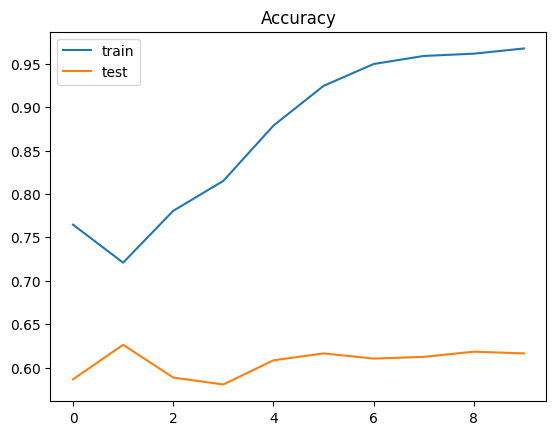

In [125]:
# Accuracy vs Epoch
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

______ 
# Result

Here are the scores on validation data set with different architecture. 


| Test Round |  Architecture Detail                                       |  Score        |
|------------|------------------------------------------------------------|---------------|
| 1st Try    |  RNN with one layer   LSTM                                 | 0.6004        |
| 2nd Try    |  RNN with one layer LSTM, L2 regularization and dropout    | 0.5606        |
| 3rd Try    |  RNN with one layer   GRU                                  | 0.5924        |
| 4th Try    | LSTM with learning rate schedule                           | **0.6223**    |
| 5th Try    | 2 layers LSTM with learning rate schedule                  | 0.6163        |


As we can see from the result, LSTM performed slightly better than GRU in this practice (accuracy score 0.6004 vs 0.5924).

Then I try to reduce the overfitting by adding L2 regularization and dropout. But the accuracy on validation set didn't get improved.

After adding learning rate schedule to LSTM model, the score improved from 0.6004 to 0.6223, as it allows model to escape local minima or plateaus in the loss landscape. 


Then I tried deeper architecture with 2 layers LSTM, but it seems it met overfitting issue, the score got decreased (0.6163).

So after 5 tries, the highest score I got from the balanced data is only 0.6223, which isn’t great, but it’s a start. And these result are based on 'summary' column.There is room to increase the accuracy by using 'reviewText' column.

So here are the **next steps:** 

* Process 'reviewText' Column and train model on it
* Solve the overfitting issue, by applying more dropout layers to the model.
* Try more complicated Architectures

